This notebook is used to visualize correlations between features and other things. Not that important, you probably want to look at the `playground.ipynb` notebook instead.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyarrow as pa
import pyarrow.parquet as pq

# load
phishing = pq.read_table('floor/phishing_2307.parquet')
benign_u = pq.read_table('floor/benign_2307.parquet')

from transformers.drop_nontrain import drop_nontrain_table as drop_nontrain
phishing = drop_nontrain(phishing)
benign_u = drop_nontrain(benign_u)

phishing_order = phishing.schema.names
benign = benign_u.select(phishing_order)

data = pa.concat_tables([phishing, benign])
df = data.to_pandas()

df


<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.IpcWriteOptions size changed, may indicate binary incompatibility. Expected 72 from C header, got 88 from PyObject


,label,dns_has_dnskey,dns_A_count,dns_AAAA_count,dns_MX_count,dns_NS_count,dns_TXT_count,dns_SOA_count,dns_CNAME_count,dns_dn_level,...,lex_sub_digit_count,lex_sub_digit_ratio,lex_sub_consonant_ratio,lex_sub_non_alphanum_ratio,lex_sub_hex_ratio,geo_countries_count,geo_continent_hash,geo_countries_hash,rdap_domain_registration_period,rdap_has_dnssec
0,misp_2307:phishing,0.0,2,0,0,0,0,0,0,1,...,0.0,0.000000,0.600000,0.066667,0.333333,1,2,1800,6209 days,False
1,misp_2307:phishing,0.0,1,0,0,0,0,0,0,2,...,10.0,0.285714,0.344828,0.103448,0.551724,1,3,184,1827 days,False
2,misp_2307:phishing,1.0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.384615,0.000000,0.461538,0,0,0,NaT,False
3,misp_2307:phishing,0.0,0,0,0,0,0,0,1,1,...,0.0,0.000000,0.823529,0.000000,0.117647,1,1,600,6209 days,False
4,misp_2307:phishing,0.0,1,0,0,0,0,0,0,1,...,4.0,0.137931,0.400000,0.040000,0.440000,1,0,144,2556 days,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469560,benign_2307:unknown,0.0,2,0,2,2,2,1,0,0,...,0.0,0.000000,0.571429,0.000000,0.285714,1,2,1800,9131 days,False
469561,benign_2307:unknown,0.0,1,1,0,2,1,1,0,0,...,0.0,0.000000,1.000000,0.000000,0.000000,1,2,1800,NaT,False
469562,benign_2307:unknown,0.0,2,0,1,4,0,1,0,0,...,0.0,0.000000,0.625000,0.062500,0.312500,1,10,172,3287 days,False
469563,benign_2307:unknown,0.0,1,1,1,3,1,1,0,0,...,0.0,0.000000,0.666667,0.000000,0.166667,1,6,130,5479 days,False


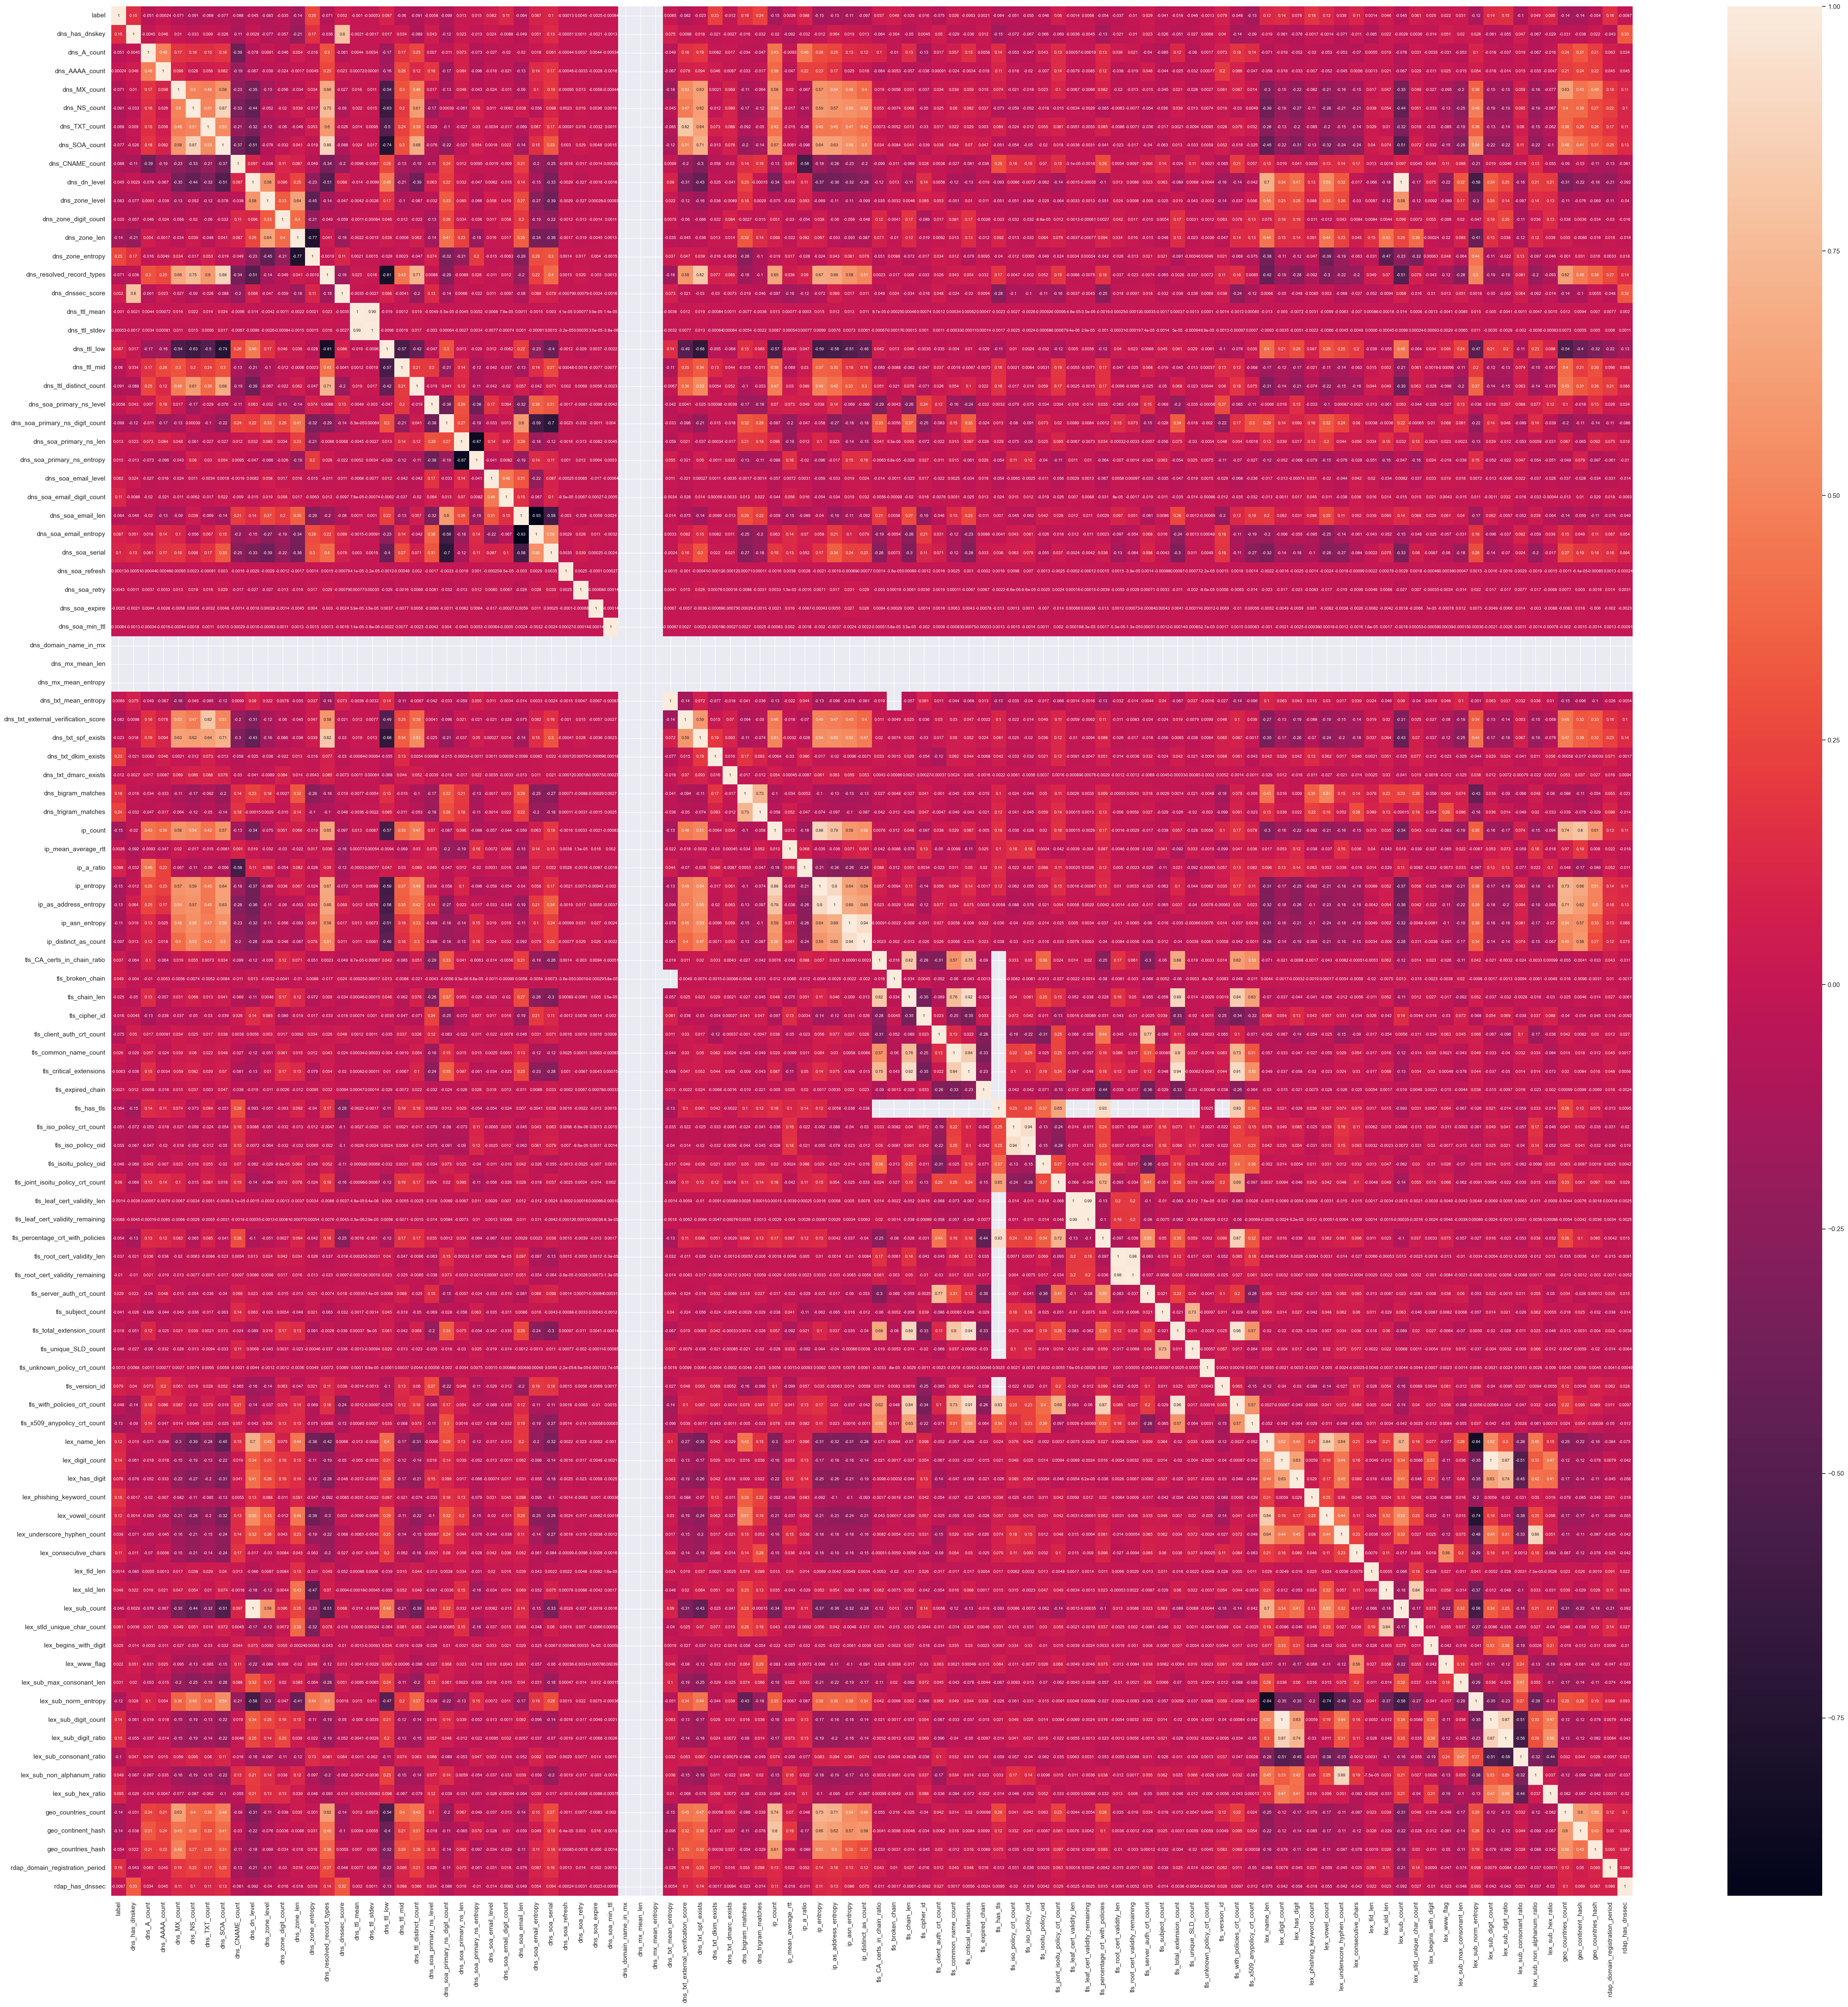

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_coded = df.copy()
df_coded['label'] = le.fit_transform(df_coded['label'])

sns.set(rc={'figure.figsize':(58,58)})
corrMatrix = df_coded.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.show()

In [16]:
#sns.pairplot(df[["label", "dns_NS_count", "dns_SOA_count", "countries_count", "leaf_cert_valid_len"]], hue='label')

In [3]:
a = ['domain_name', 'label', 'tls_evaluated_on', 'dns_evaluated_on', 'dns_A', 'dns_AAAA', 'dns_CNAME', 'dns_MX', 'dns_NS', 'dns_SOA', 'dns_TXT', 'countries', 'latitudes', 'longitudes', 'average_rtt', 'has_tls', 'tls_chain_len', 'tls_version_score', 'tls_cipher_score', 'root_cert_validity_len', 'root_cert_validity_remaining', 'leaf_cert_validity_len', 'leaf_cert_validity_remaining', 'mean_certs_validity_len', 'broken_chain', 'expired_chain', 'total_extension_count', 'critical_extensions', 'have_policies', 'percentage_of_policies', 'unknown_usage', 'anypolicy_count', 'joint-iso-itu_policy_count', 'iso_policy_count', 'subject_count', 'server_auth_certs', 'client_auth_certs', 'CA_certs_in_chain_count', 'CA_certs_in_chain_ratio', 'lex_name_len', 'lex_subdomain_count', 'lex_subdomain_len', 'lex_digit_count', 'lex_has_digit', 'lex_phishing_keyword_count', 'tmp_tld', 'tmp_sld', 'tmp_stld', 'tmp_concat_subdomains', 'lex_tld_len', 'lex_sub_count', 'lex_stld_unique_chars', 'lex_first_digit_flag', 'lex_www_flag', 'lex_sub_max_consonant_len', 'lex_sub_norm_entropy', 'lex_sub_consonant_ratio', 'lex_sub_non_alphanum_ratio', 'lex_sub_hex_ratio', 'ip_entropy', 'countries_count', 'lat_stddev', 'lon_stddev', 'dns_A_count', 'dns_AAAA_count', 'dns_CNAME_count', 'dns_MX_count', 'dns_NS_count', 'dns_SOA_count', 'dns_TXT_count', 'domain_registration_period', 'domain_lifetime', 'domain_time_from_last_change', 'domain_name', 'label', 'tls_evaluated_on', 'dns_evaluated_on', 'dns_A', 'dns_AAAA', 'dns_CNAME', 'dns_MX', 'dns_NS', 'dns_SOA', 'dns_TXT', 'countries', 'latitudes', 'longitudes', 'average_rtt', 'has_tls', 'tls_chain_len', 'tls_version_score', 'tls_cipher_score', 'root_cert_validity_len', 'root_cert_validity_remaining', 'leaf_cert_validity_len', 'leaf_cert_validity_remaining', 'mean_certs_validity_len', 'broken_chain', 'expired_chain', 'total_extension_count', 'critical_extensions', 'have_policies', 'percentage_of_policies', 'unknown_usage', 'anypolicy_count', 'joint-iso-itu_policy_count', 'iso_policy_count', 'subject_count', 'server_auth_certs', 'client_auth_certs', 'CA_certs_in_chain_count', 'CA_certs_in_chain_ratio', 'lex_name_len', 'lex_subdomain_count', 'lex_subdomain_len', 'lex_digit_count', 'lex_has_digit', 'lex_phishing_keyword_count', 'tmp_tld', 'tmp_sld', 'tmp_stld', 'tmp_concat_subdomains', 'lex_tld_len', 'lex_sub_count', 'lex_stld_unique_chars', 'lex_first_digit_flag', 'lex_www_flag', 'lex_sub_max_consonant_len', 'lex_sub_norm_entropy', 'lex_sub_consonant_ratio', 'lex_sub_non_alphanum_ratio', 'lex_sub_hex_ratio', 'ip_entropy', 'countries_count', 'lat_stddev', 'lon_stddev', 'dns_A_count', 'dns_AAAA_count', 'dns_CNAME_count', 'dns_MX_count', 'dns_NS_count', 'dns_SOA_count', 'dns_TXT_count', 'domain_registration_period', 'domain_lifetime', 'domain_time_from_last_change', 'dns_soa_primary_ns_subdomains', 'dns_soa_primary_ns_digit_count', 'dns_soa_primary_ns_len', 'dns_soa_admin_email_len', 'dns_soa_admin_email_subdomains', 'dns_soa_admin_email_digit_count', 'domain_name_in_mx', 'dns_txt_google_vetified', 'hovno']
seen = set()
uniq = []
for x in a:
    if x not in seen:
        uniq.append(x)
        seen.add(x)
    else:
        print("duplicate! " + str(x))

duplicate! domain_name
duplicate! label
duplicate! tls_evaluated_on
duplicate! dns_evaluated_on
duplicate! dns_A
duplicate! dns_AAAA
duplicate! dns_CNAME
duplicate! dns_MX
duplicate! dns_NS
duplicate! dns_SOA
duplicate! dns_TXT
duplicate! countries
duplicate! latitudes
duplicate! longitudes
duplicate! average_rtt
duplicate! has_tls
duplicate! tls_chain_len
duplicate! tls_version_score
duplicate! tls_cipher_score
duplicate! root_cert_validity_len
duplicate! root_cert_validity_remaining
duplicate! leaf_cert_validity_len
duplicate! leaf_cert_validity_remaining
duplicate! mean_certs_validity_len
duplicate! broken_chain
duplicate! expired_chain
duplicate! total_extension_count
duplicate! critical_extensions
duplicate! have_policies
duplicate! percentage_of_policies
duplicate! unknown_usage
duplicate! anypolicy_count
duplicate! joint-iso-itu_policy_count
duplicate! iso_policy_count
duplicate! subject_count
duplicate! server_auth_certs
duplicate! client_auth_certs
duplicate! CA_certs_in_chain